In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns

### Data Questions

1. What are the busiest times of the year to visit Boston? By how much do prices spike?
2. Which Neibourhood is most expensive and what kind of listings are there in majority
3. Which params of listings impacts the most on the price?

### Data Preparations

In [2]:
###load the data
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

In [3]:
#check calendar dataset
calendar.head()
#TODO:
#- Change price to FLOAT
#- Make "available" more readable - True or False

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [4]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [5]:
listings.info()
#neighbourhood_group_cleansed, has_availability, license, jurisdiction_names are free to drop - np data there
#I think that more of the things here will come by the time :) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [6]:
reviews.head()
#nothing to do here

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


### Initial Data Cleaning

##### Calendar Dataset
- Change price to FLOAT
- Make "available" more readable - True or False
- Change date to datetime format

In [7]:
calendar['price'] = calendar['price'].str.replace('$', '')
calendar['price'] = calendar['price'].str.replace(',', '')
calendar['price'] = calendar['price'].astype(float)

/var/folders/7k/qt8g5cl13z78hvbwpzwxt9q00000gp/T/ipykernel_8799/1896319829.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar['price'] = calendar['price'].str.replace('$', '')


In [8]:
d = {'t': True, 'f': False}
calendar['available'] = calendar['available'].map(d)

In [9]:
calendar['date'] = pd.to_datetime(calendar['date'], infer_datetime_format=True)  
calendar['date']

0         2017-09-05
1         2017-09-04
2         2017-09-03
3         2017-09-02
4         2017-09-01
             ...    
1308885   2016-09-10
1308886   2016-09-09
1308887   2016-09-08
1308888   2016-09-07
1308889   2016-09-06
Name: date, Length: 1308890, dtype: datetime64[ns]

##### Listings Dataset
- neighbourhood_group_cleansed, has_availability, license, jurisdiction_names are free to drop - np data there
- I also don't need scrape_id, last_scraped, listing_url, thumbnail_url, medium_url, picture_url, xl_picture_url
- Change price format

In [10]:
listings = listings.drop(columns=['neighbourhood_group_cleansed', 'has_availability', 'license', 'jurisdiction_names'])
listings = listings.drop(columns=['scrape_id', 'last_scraped', 'listing_url', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url'])

listings['price'] = listings['price'].str.replace('$', '')
listings['price'] = listings['price'].str.replace(',', '')
listings['price'] = listings['price'].astype(float)

/var/folders/7k/qt8g5cl13z78hvbwpzwxt9q00000gp/T/ipykernel_8799/1960410852.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings['price'] = listings['price'].str.replace('$', '')


### 1. What are the busiest month of the year to visit Boston? How prices behave?

In [11]:
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,False,NaN
1,12147973,2017-09-04,False,NaN
2,12147973,2017-09-03,False,NaN
3,12147973,2017-09-02,False,NaN
4,12147973,2017-09-01,False,NaN


In [12]:
#I need for this data like price, availability (must be true), date and listing_id, all of that is in calendar
q1 = calendar[['date', 'available','price', 'listing_id']]
q1['month'] = q1['date'].dt.strftime('%Y-%m')
q1['available'] = np.where(q1['available'] == True, 1, 0) 
q1['mean_price'] = q1['price']
q1 = q1.groupby('month').agg({'listing_id': 'count', 'price':'median', 'mean_price':'mean', 'available':'sum'}).reset_index()
q1['Share'] = q1.available/q1.listing_id
q1.head()

/var/folders/7k/qt8g5cl13z78hvbwpzwxt9q00000gp/T/ipykernel_8799/4245742823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q1['month'] = q1['date'].dt.strftime('%Y-%m')
/var/folders/7k/qt8g5cl13z78hvbwpzwxt9q00000gp/T/ipykernel_8799/4245742823.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q1['available'] = np.where(q1['available'] == True, 1, 0)
/var/folders/7k/qt8g5cl13z78hvbwpzwxt9q00000gp/T/ipykernel_8799/4245742823.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,month,listing_id,price,mean_price,available,Share
0,2016-09,89650,209.0,252.677308,24401,0.272181
1,2016-10,111166,185.0,233.416248,46345,0.416899
2,2016-11,107580,160.0,202.924416,58888,0.547388
3,2016-12,111166,155.0,192.601915,60997,0.548702
4,2017-01,111166,150.0,182.799671,63181,0.568348


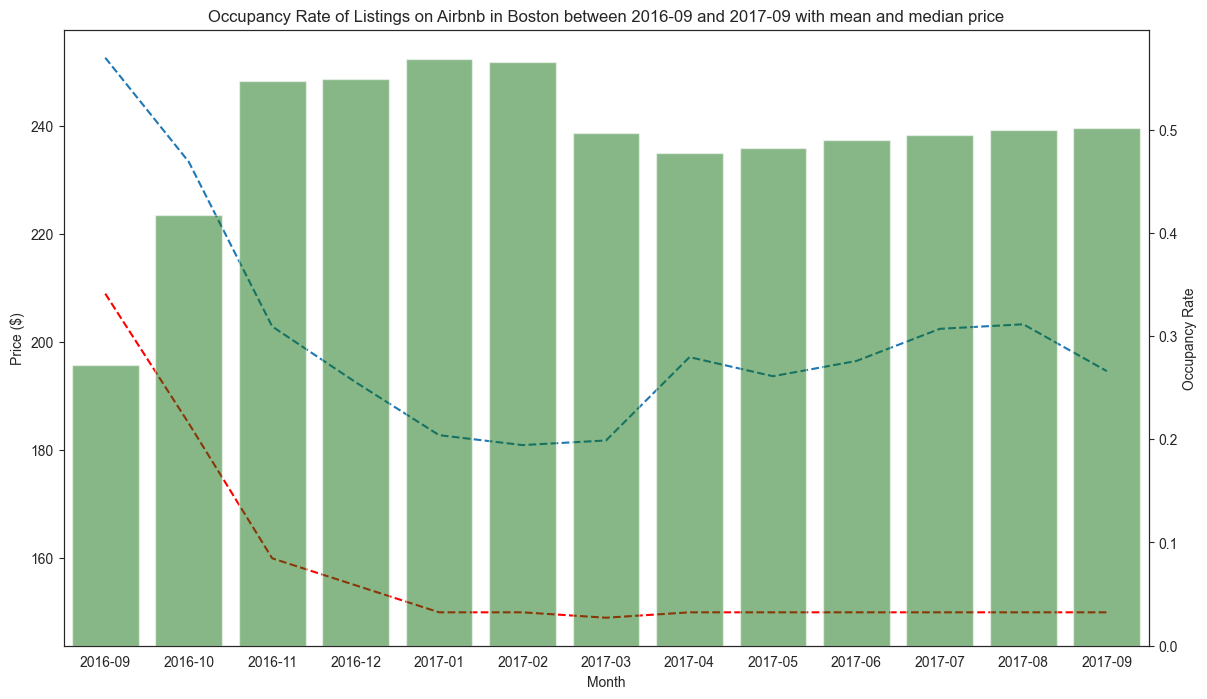

In [85]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style="white", rc=None )

fig, ax1 = plt.subplots(figsize=(14,8))

sns.lineplot(data = q1['mean_price'], ls='--', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.lineplot(data = q1['price'], ls='--', color='r', sort = False, ax=ax1)

sns.barplot(data = q1, x='month', y='Share', color='g', alpha=0.5).set_title('Occupancy Rate of Listings on Airbnb in Boston between 2016-09 and 2017-09 with mean and median price')

ax2.set_ylabel('Occupancy Rate')
ax1.set_ylabel('Price ($)')
ax1.set_xlabel('Month');

### 2. Which Neibourhood is the most expensive?

In [14]:
listings.columns

Index(['id', 'name', 'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state',
       'zipcode', 'market', 'smart_location', 'country_code', 'country',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_

In [16]:
from scipy import stats

##Choose and transfor data
q2 = listings[['neighbourhood','price']]
q2 = q2.dropna()
#Remove outliers
q2 = q2[(np.abs(stats.zscore(q2['price'])) < 3)]

nei = q2.groupby("neighbourhood").count().reset_index()
nei = nei[nei.price >= 10]
nei = list(nei.neighbourhood.unique())

q2 = q2[q2.neighbourhood.isin(nei)]

q2.head()

,neighbourhood,price
0,Roslindale,250.0
1,Roslindale,65.0
2,Roslindale,65.0
4,Roslindale,79.0
5,Roslindale,75.0


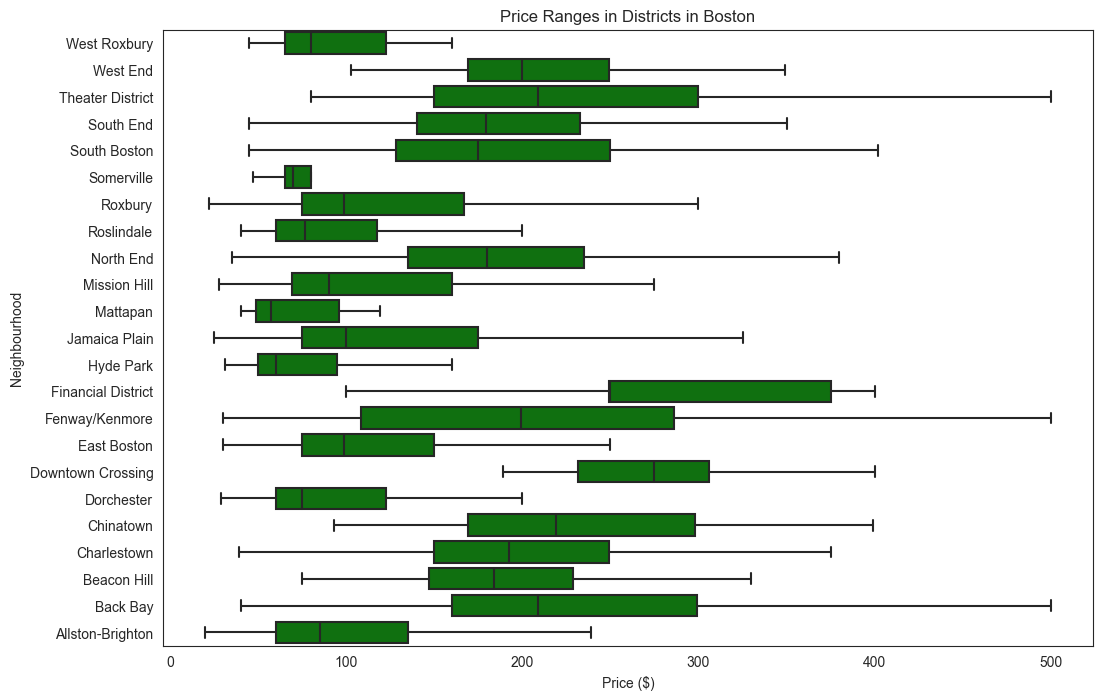

In [17]:
#Order list
my_order = q2.groupby(by=["neighbourhood"])["price"].count().iloc[::-1].index

#Viz
plt.figure(figsize=(12,8))
ax = sns.boxplot(x="price", y="neighbourhood", data=q2, showfliers=False, color = 'g', order=my_order)
ax.set_ylabel('Neighbourhood')
ax.set_xlabel('Price ($)')
ax.set_title('Price Ranges in Districts in Boston');

### 3. Which params of listings impacts the most on the review?

In [24]:
listings.columns

Index(['id', 'name', 'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state',
       'zipcode', 'market', 'smart_location', 'country_code', 'country',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_

/Users/maciejgieparda/opt/anaconda3/envs/uDacity/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


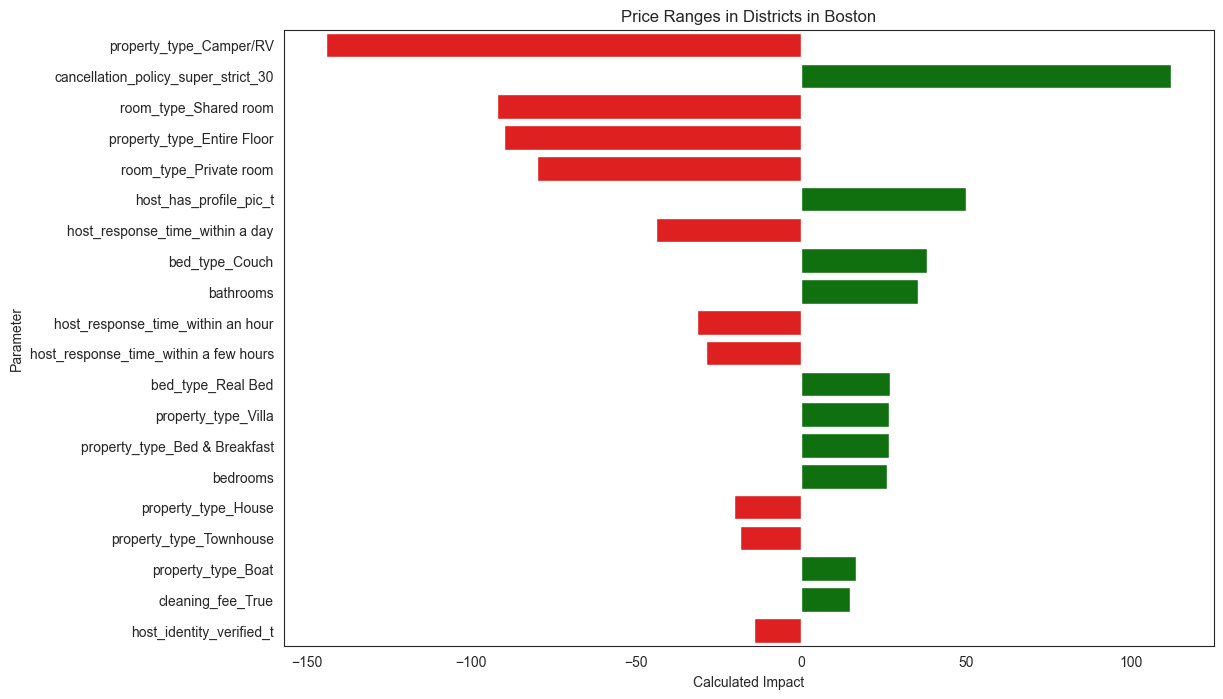

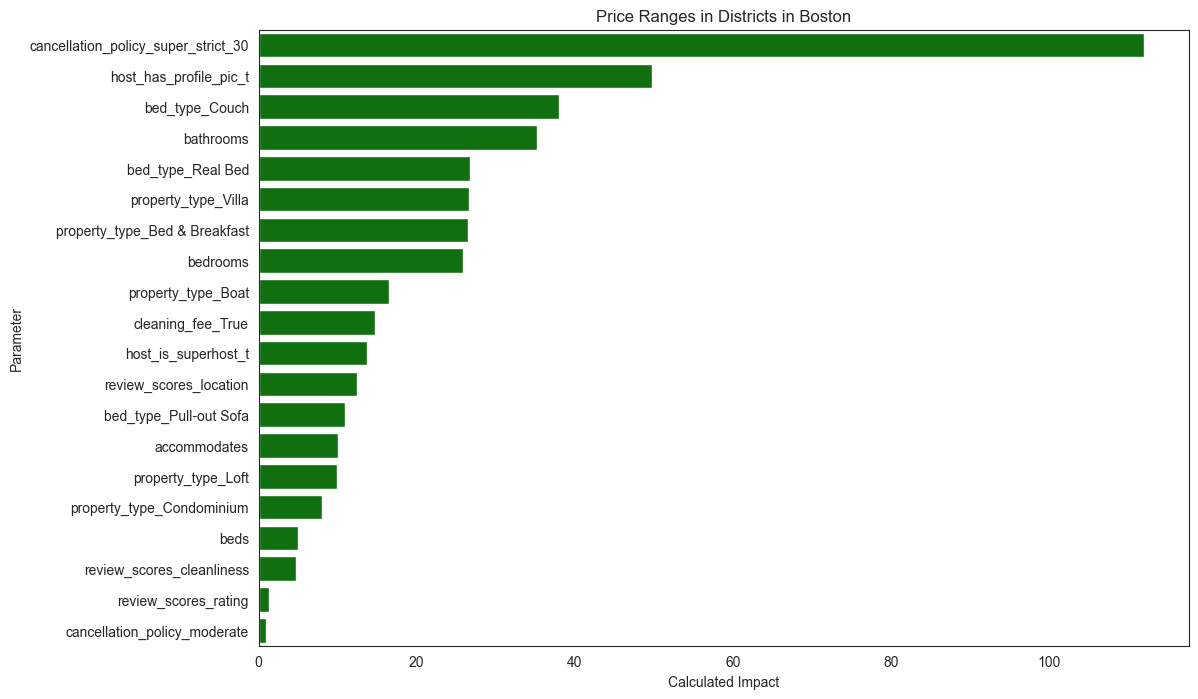

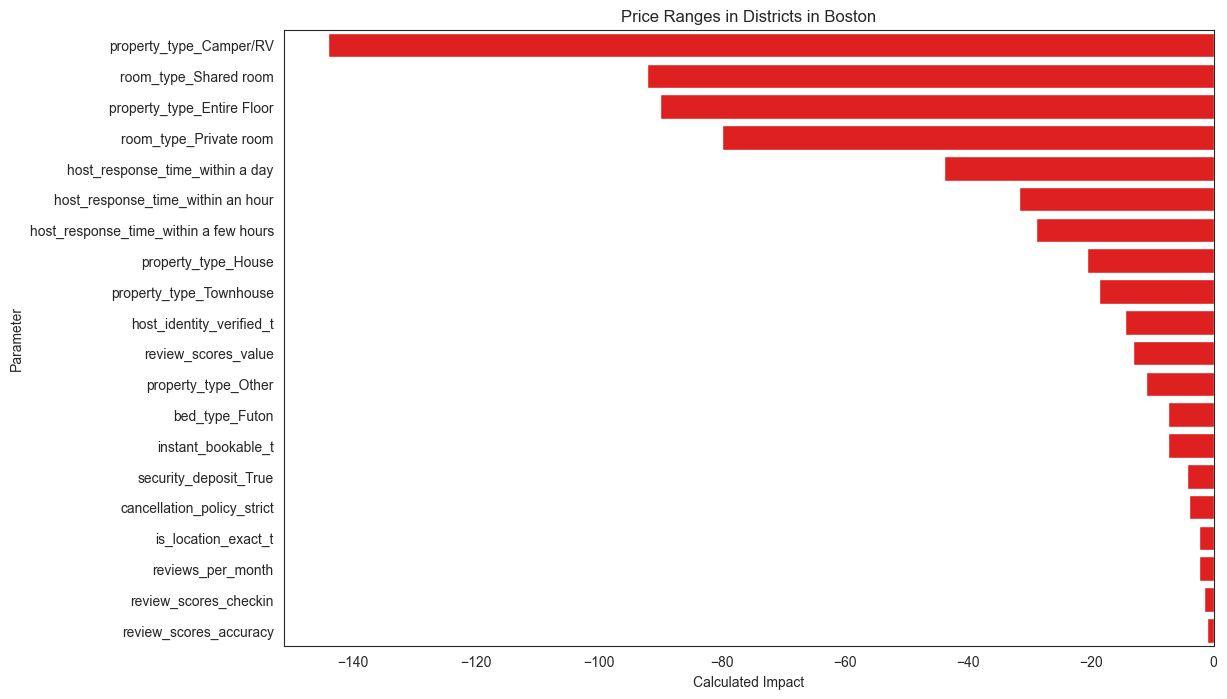

In [83]:
#Drop not needed columns
q3 = listings.drop(columns=['id', 'name', 'space','host_name', 'host_since',
       'host_location', 'host_about', 'interaction', 'house_rules', 'summary', 'neighborhood_overview',
       'notes', 'transit', 'access', 'host_id', 'host_url', 'description', 'last_review', 'first_review'
       , 'amenities', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count', 'street', 'host_acceptance_rate', 'host_response_rate', 'weekly_price',
       'monthly_price', 'zipcode', 'latitude','longitude', 'calendar_last_scraped', 'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'smart_location', 'city', 'host_verifications', 'market', 'neighbourhood_cleansed', 'calendar_updated', 'neighbourhood'])

# Drop rows with missing salary values
q3 = q3.dropna(subset=['price'], axis=0)
y = q3['price']
q3 = q3.drop(['price'], axis=1)

#Change some columns for true/false
q3['security_deposit'] = np.where(q3['security_deposit'].isnull(), 'True', 'False') 
q3['cleaning_fee'] = np.where(q3['cleaning_fee'].isnull(), 'True', 'False') 
q3['extra_people'] = np.where(q3['extra_people'].isnull(), 'True', 'False') 

# Fill numeric columns with the mean
num_vars = q3.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
    q3[col].fillna((q3[col].mean()), inplace=True)
        
# Dummy the categorical variables
cat_vars = q3.select_dtypes(include=['object']).copy().columns
for var in  cat_vars:
    # for each cat add dummy var, drop original column
    q3 = pd.concat([q3.drop(var, axis=1), pd.get_dummies(q3[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
X = q3

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

coefs_df = pd.DataFrame()
coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = lm_model.coef_
coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)


#Color Palette
custom_palette = {}
for q in set(coefs_df.est_int):
    avr = (np.average(coefs_df[coefs_df.est_int == q].coefs))
    if avr < 0:
        custom_palette[q] = 'r'
    else:
        custom_palette[q] = 'g'

#Viz

plt.figure(figsize=(12,8))
ax = sns.barplot(x="coefs", y="est_int", data=coefs_df.sort_values(by=['abs_coefs'], ascending=False).head(20), palette = custom_palette)
ax.set_ylabel('Parameter')
ax.set_xlabel('Calculated Impact')
ax.set_title('Price Ranges in Districts in Boston');

#Viz

pal = sns.color_palette("Greens_d", len(coefs_df))
plt.figure(figsize=(12,8))
ax1 = sns.barplot(x="coefs", y="est_int", data=coefs_df.sort_values(by=['coefs'], ascending=False).head(20), palette = custom_palette)
ax1.set_ylabel('Parameter')
ax1.set_xlabel('Calculated Impact')
ax1.set_title('Price Ranges in Districts in Boston');

#Viz
pal = sns.color_palette("Greens_d", len(coefs_df))
plt.figure(figsize=(12,8))
ax2 = sns.barplot(x="coefs", y="est_int", data=coefs_df.sort_values(by=['coefs'], ascending=True).head(20), palette = custom_palette)
ax2.set_ylabel('Parameter')
ax2.set_xlabel('Calculated Impact')
ax2.set_title('Price Ranges in Districts in Boston');